<a href="https://colab.research.google.com/github/JoleneShyu/Test-project/blob/main/%E9%81%B8%E5%9D%80XGBClassifier_testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir() #左邊檔案裏要開放連結到我的雲端硬碟,os.listdir()才能抓到'drive',才能找到放在雲端硬碟的檔案路徑
os.listdir('drive/MyDrive/Colab Notebooks')

['「0320_precourse_python.ipynb」的副本',
 '「DataAnalysis.BM101007.ipynb',
 'v3-boston_house_price.ipynb',
 'v3-iris_classification.ipynb',
 '「Colab_Demo_設計你的神經網路.ipynb」-蔡炎龍',
 'Udemy-The Python Mega Course',
 'practice01.ipynb',
 'Untitled',
 'NearBy (1).py',
 'NearBy.py',
 'openstmp_fmChang.ipynb',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 '「OSM API測試_fmChang.ipynb」',
 'AIA Project',
 '選址XGBClassifier_testrun.ipynb']

In [ ]:
# Import everything
import pandas as pd
import numpy as np


# Create a DataFrame
df = pd.read_excel('drive/MyDrive/Colab Notebooks/AIA Project/選址因子06012_J_data.xlsx')

# Print the head of the data. #df.head() will defaul to first 5 rows
df.head()
df

,業績分類,大學,高中職,同業(連鎖茶飲店),美妝店\n,著名觀光景點/商圈,醫院,工業區,公家機關,交通站點,量販店,連鎖便利商店\n,連鎖速食店,同業(其他連鎖茶飲店)\n,嫌惡設施：\n加油站、瓦斯行、焚化爐、資源回收場,嫌惡設施：\n鐵道、捷運軌道、高壓電塔、變電所,嫌惡設施：\n傳統市場、夜市
0,1,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,3,0,0,0,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,3,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
106,3,0,0,1,2,0,0,0,0,0,1,1,0,3,1,0,1
107,3,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0
108,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
!pip install xgboost
!pip install shap  #沒有辦法直接import shap


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier

In [ ]:
import xgboost
import matplotlib.pylab as pl
import shap


In [ ]:
X = df.loc[:,df.columns!='業績分類']
y = df.loc[:,'業績分類']
print(X)
print(y)

In [ ]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = XGBClassifier()

model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Check Performance
#The C-statistic measures how well we can order people by their survival time (1.0 is a perfect ordering).

def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
c_statistic_harrell(model.predict(X_test), y_test)

KeyError: ignored

Glyph 24037 missing from current font.
Glyph 26989 missing from current font.
Glyph 21312 missing from current font.
Glyph 23244 missing from current font.
Glyph 24801 missing from current font.
Glyph 35373 missing from current font.
Glyph 26045 missing from current font.
Glyph 65306 missing from current font.
Glyph 37941 missing from current font.
Glyph 36947 missing from current font.
Glyph 12289 missing from current font.
Glyph 25463 missing from current font.
Glyph 36939 missing from current font.
Glyph 36556 missing from current font.
Glyph 39640 missing from current font.
Glyph 22739 missing from current font.
Glyph 38651 missing from current font.
Glyph 22612 missing from current font.
Glyph 35722 missing from current font.
Glyph 25152 missing from current font.
Glyph 37291 missing from current font.
Glyph 38498 missing from current font.
Glyph 36899 missing from current font.
Glyph 37782 missing from current font.
Glyph 20415 missing from current font.
Glyph 21033 missing from 

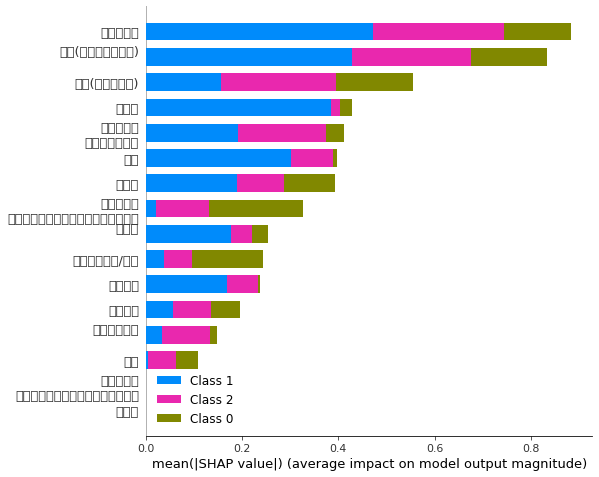

In [ ]:
#Explain the model's predictions on the entire dataset
shap_values = shap.TreeExplainer(model).shap_values(X)

#SHAP Summary Plot
#The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of dying for a Cox proportional hazards model. We can see below that the primary risk factor for death according to the model is being old. The next most powerful indicator of death risk is being a man.
#This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk (such that a high white blood cell count leads to a high risk of death).
shap.summary_plot(shap_values, X)

In [ ]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot('大學',shap_values,X)

TypeError: ignored

In [ ]:
# we pass display_features so we get text display values for sex
shap.dependence_plot("大學", shap_values, X, display_features=X_display)

NameError: ignored

In [ ]:
# setting show=False allows us to continue customizing the matplotlib plot before displaying it
shap.dependence_plot("大學", shap_values, X, show=False)
pl.xlim(80,225)
pl.show()

TypeError: ignored

TypeError: ignored

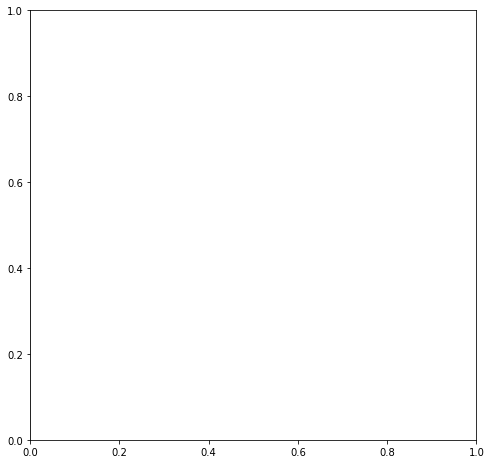

In [ ]:
#Compute SHAP Interaction Values
#See the Tree SHAP paper for more details, but briefly, SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X)

#SHAP Interaction Value Summary Plot
#A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.
shap.summary_plot(shap_interaction_values,X)

In [ ]:
import matplotlib.pylab as pl
import numpy as np
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(17,17))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

IndexError: ignored